In [1]:
from dask.distributed import Client
import dask.dataframe as dd
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression

In [2]:
# connecting to dask scheduler
#client = Client("tcp://172.31.31.30:8786")
#print("dashboard link : ",client.dashboard_link)

dashboard link :  http://172.31.31.30:8787/status


/home/ubuntu/ashu-env/lib/python3.12/site-packages/distributed/client.py:1612: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | Client | Scheduler | Workers |
+---------+--------+-----------+---------+
| numpy   | 2.1.3  | 2.2.4     | 2.2.4   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [2]:
# reading data from csv
data_url = "https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/advertising.csv"
df = dd.read_csv(data_url)

In [3]:
# checking metadata using pandas 
df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 4 entries, TV to Sales
dtypes: float64(4)

In [4]:
# selecting features and labels 
labels = df['Sales']
features = df[['TV','Radio','Newspaper']]
#print(features)

In [5]:
# as per dask-ml asking  
# Converting dask Df to dask array for computation purpose 
features1 = features.to_dask_array(lengths=True)
labels1 = labels.to_dask_array(lengths=True)

In [6]:
# spliting features and labels into training and testing data 90% , 10% 
# test_size == 0.0 to 1.0  0.1 -- 10% , 0.2 -- 20% 
feature_90,feature_10,label_90,label_10=train_test_split(features1,labels1,test_size=0.1)

In [7]:
# selecting Linear Regression 
model = LinearRegression()

In [8]:
# training model with 90% data of features and labels 
trained_model = model.fit(feature_90,label_90)

In [13]:
# Eval or testing 
predicted_output = trained_model.predict(feature_10)
predicted_output1=predicted_output.compute()
print(predicted_output1)

[21.89872476 20.99969736  8.02112516 14.94827808 14.13676657 17.4898219
 11.32591637  9.67699073 24.64251393  6.09972277  9.82158927 19.96479269
 13.56224486  8.53702648 15.06826135 10.50995822  8.75100704 11.23775698
 16.13068302 14.48978677]


In [14]:
# actual answers as well
actual_output = label_10.compute()
print(actual_output)

[23.2 22.1  7.  15.2 14.2 18.4 10.4  8.8 25.4  3.2 11.9 19.6 12.2  8.4
 15.5  7.2 12.6 10.8 17.2 16.7]


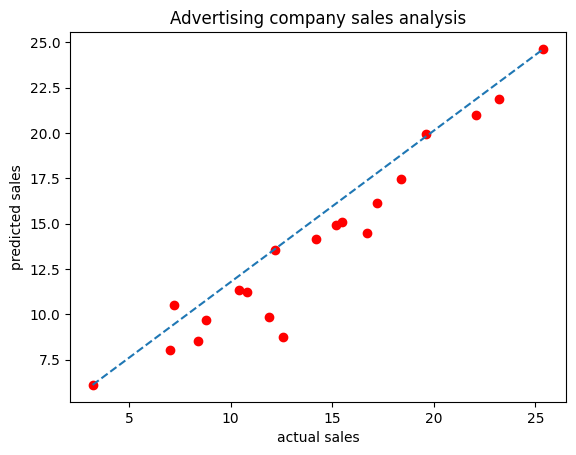

In [18]:
# ploting graph predicted vs actual sales
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("Advertising company sales analysis")
plt.scatter(actual_output,predicted_output1,color='red')
plt.plot([min(actual_output),max(actual_output)],[min(predicted_output1),max(predicted_output1)],linestyle='--')
plt.show()

In [20]:
# calculating coeff values of feature as per model 
coef_values = trained_model.coef_
feature_names = features.columns
print(feature_names)
print(coef_values)

Index(['TV', 'Radio', 'Newspaper'], dtype='object')
[0.05294115 0.11063932 0.00057518]


In [21]:
# printing values 
print("impact vavlues ")
for feature,coef  in  zip(feature_names,coef_values):
    print(f"{feature} : {coef:.4f}")

impact vavlues 
TV : 0.0529
Radio : 0.1106
Newspaper : 0.0006


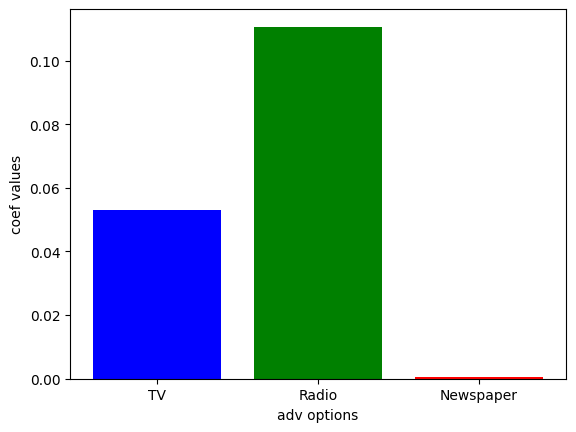

In [23]:
# ploting graph with features_name and coef values
plt.xlabel("adv options")
plt.ylabel("coef values")
plt.bar(feature_names,coef_values,color=['blue','green','red'])
plt.show()